# Exploratory Data Analysis of EUR/USD of the last 10 years
#### This notebook contains:
- Data Inspection
- Pattern and Trend analysis
- Volitility Analysis
- Correlation Analysis
- Preprocessing
- Feature engineering
- Feature Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the CSV
data = pd.read_csv("../data/raw/eur_usd_data.csv", parse_dates=["date"], index_col="date")

data.head()

,Open,High,Low,Close
date,,,,
2014-11-23,1.23742,1.24403,1.23742,1.23750
2014-11-24,1.24360,1.24789,1.24060,1.24332
2014-11-25,1.24789,1.25246,1.24444,1.24806
2014-11-26,1.25055,1.25210,1.24662,1.25059
2014-11-27,1.24583,1.24895,1.24311,1.24620


# Dataset Column Descriptions

The dataset contains the historical daily exchange rates for the EUR/USD currency pair. Below is a description of each column:

| Column Name | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| `date`      | The date of the trading session (formatted as YYYY-MM-DD).                 |
| `Open`      | The exchange rate at the start of the trading session.                     |
| `High`      | The highest exchange rate recorded during the trading session.             |
| `Low`       | The lowest exchange rate recorded during the trading session.              |
| `Close`     | The exchange rate at the end of the trading session (the closing price).   |

### Notes:
- **EUR/USD Exchange Rate:** This represents how many U.S. dollars (USD) are required to purchase one Euro (EUR) on a given day.
- The data does not include trading volume or other auxiliary information.

## Data Inspection

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2608 entries, 2014-11-23 to 2024-11-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2608 non-null   float64
 1   High    2608 non-null   float64
 2   Low     2608 non-null   float64
 3   Close   2608 non-null   float64
dtypes: float64(4)
memory usage: 101.9 KB


(2608, 4)

In [4]:
#checkk for missing values:
print(data.isnull().sum())

Open     0
High     0
Low      0
Close    0
dtype: int64


In [5]:
data.describe()

,Open,High,Low,Close
count,2608.000000,2608.000000,2608.000000,2608.000000
mean,1.121029,1.124594,1.117390,1.121046
std,0.053111,0.052918,0.053301,0.053122
min,0.959620,0.967010,0.954020,0.959620
25%,1.085515,1.088847,1.082168,1.085505
50%,1.115860,1.119750,1.112585,1.115875
75%,1.159590,1.162555,1.156367,1.159630
max,1.251380,1.256570,1.246620,1.251200


## Time series Visualization

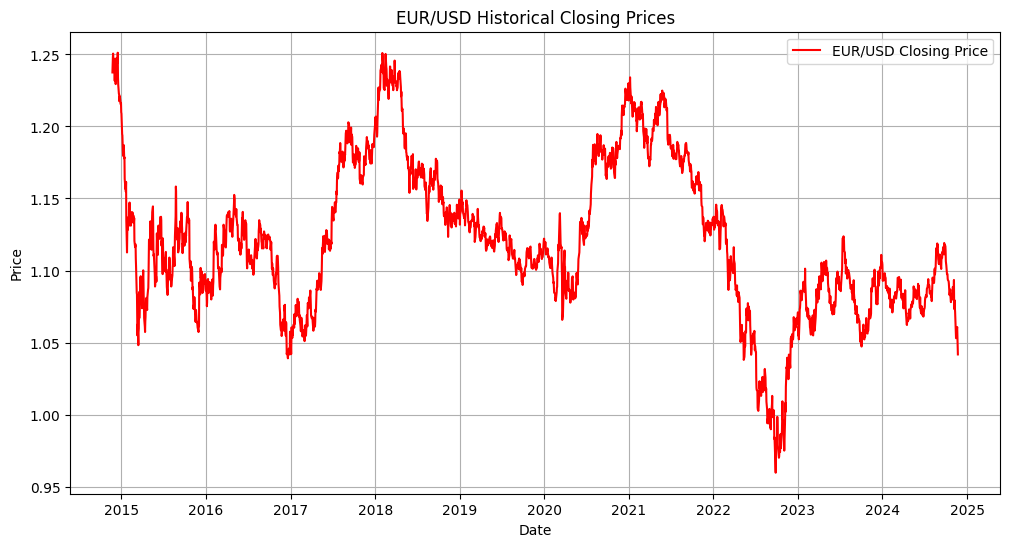

In [6]:
#Plot for closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='EUR/USD Closing Price', color='red')
plt.title('EUR/USD Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

The EUR/USD exchange rate has shown significant fluctuations over the years.
There was a general downward trend between 2015 and 2020, with EUR losing value against USD.

A sharp drop occurred around 2022, likely tied to global economic or geopolitical factors (e.g., inflation, monetary policies, or the Russia-Ukraine conflict).

Some recovery occurred after the sharp decline, but the exchange rate remains highly volatile with multiple spikes and dips.

The most recent data suggests another decline, indicating renewed weakness in the Euro relative to the Dollar.

The dataset exhibits periods of high and low volatility, which could be critical for feature engineering (e.g., volatility measures) or modeling price momentum.


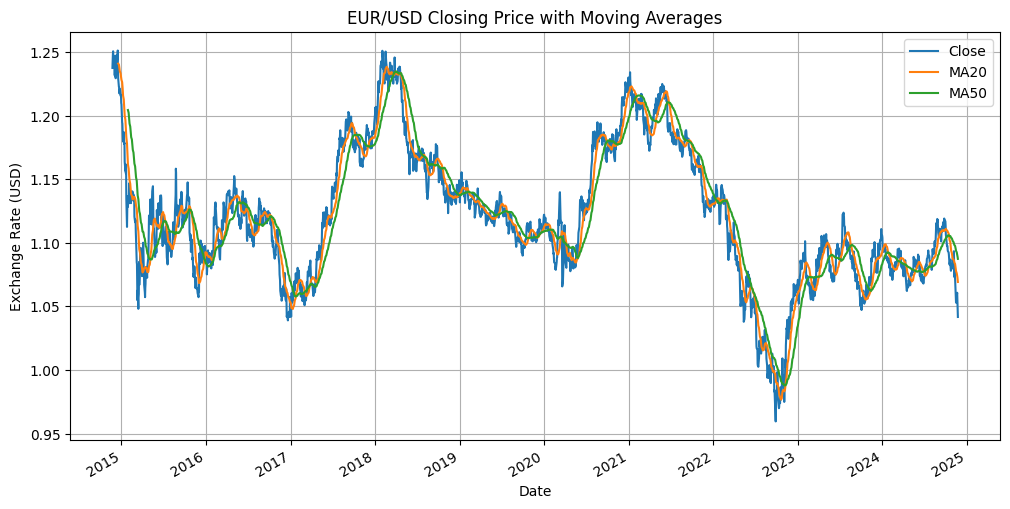

In [7]:
#Moving avarages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

data[['Close', 'MA20', 'MA50']].plot(figsize=(12, 6), title='EUR/USD Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD)')
plt.grid()
plt.show()

#### Trend Identification:
The MA20 (orange) closely tracks the price, highlighting short-term trends and volatility.
The MA50 (green) smoothens out fluctuations, providing a clearer view of the broader market trend.


#### Golden Crosses and Death Crosses:
Golden Cross: When the MA20 crosses above the MA50, it often indicates a bullish signal (price might increase).
Death Cross: When the MA20 crosses below the MA50, it signals a bearish trend (price might decrease).
##### Example:
Around 2020, there’s a visible golden cross signaling recovery.
Around 2022, there’s a death cross before the sharp decline.


#### Support and Resistance Zones:
The moving averages act as dynamic support or resistance levels. For example:
2023–2024: The MA20 and MA50 frequently converge, indicating price consolidation (low volatility).


#### High Volatility Periods:
The distance between the moving averages increases during high volatility (e.g., 2015, 2020-2021, 2022).

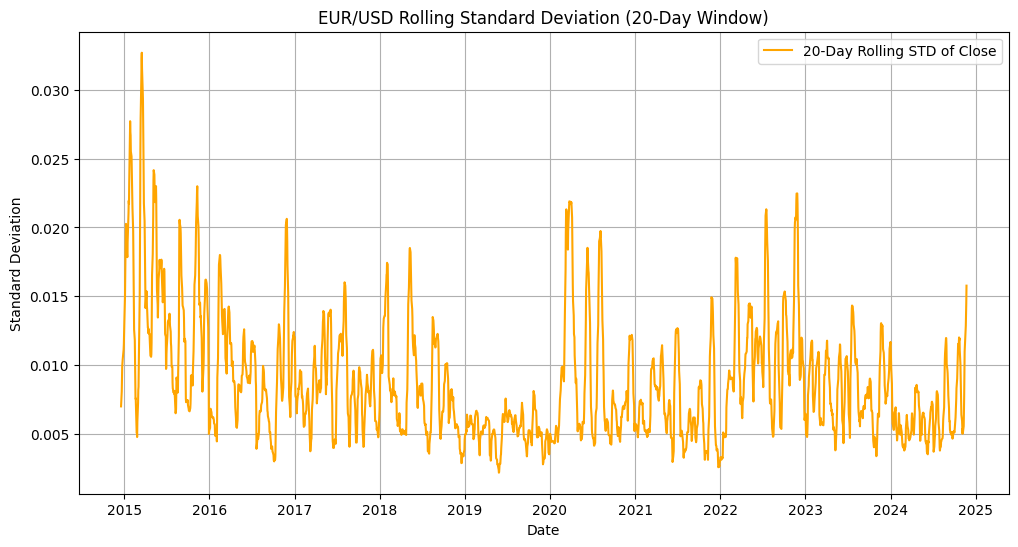

In [8]:
#rolling standard deviation
data['Rolling_STD'] = data['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Rolling_STD'], label='20-Day Rolling STD of Close', color='orange')
plt.title('EUR/USD Rolling Standard Deviation (20-Day Window)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.grid()
plt.legend()
plt.show()

#### High Volatility Periods:
2015 and 2020: Noticeable spikes in the rolling standard deviation, indicating significant price fluctuations during these periods.
2022: Another period of increased volatility, likely tied to geopolitical or economic events.

#### Low Volatility Periods:
2018 and 2021: Relatively stable periods where the rolling standard deviation is consistently low.
Suggests periods of market consolidation or less trading activity.

#### Recent Volatility (2024–2025):
There are signs of rising volatility again towards the end of the data, which could indicate renewed uncertainty in the market.

#### Trend Correlation:
Higher volatility tends to accompany periods of sharp price movement (upward or downward trends), such as the steep declines in 2015 and 2022.

## Daily Returns

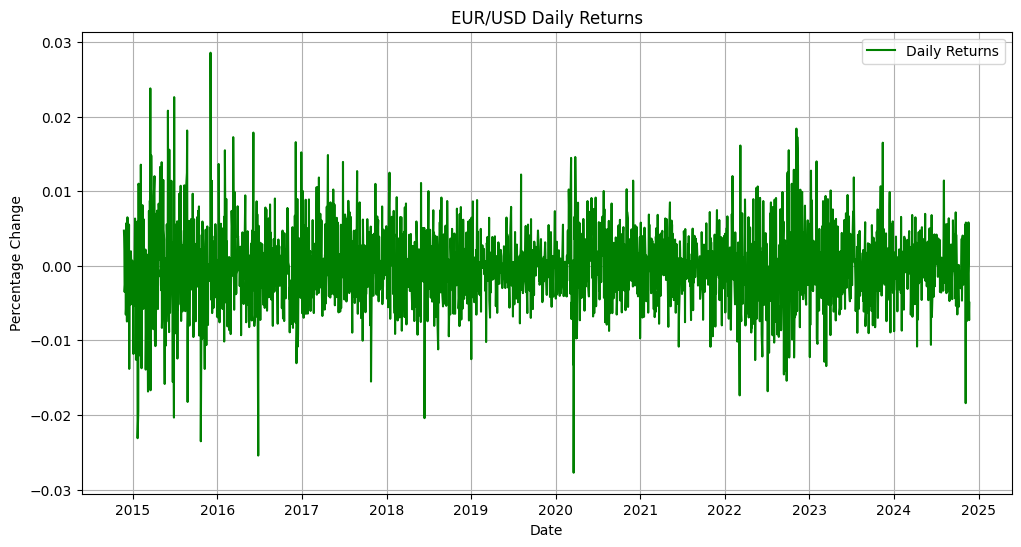

In [9]:
#Daily return
data['Daily_Return'] = data['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(data['Daily_Return'], label='Daily Returns', color='green')
plt.title('EUR/USD Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid()
plt.legend()
plt.show()

#### Stable Range of Returns:
Most daily returns are clustered between -1% and +1%, indicating relatively low daily fluctuations in the exchange rate.
This behavior is typical for a currency pair like EUR/USD, which is considered relatively stable compared to equities or cryptocurrencies.

#### Extreme Outliers:
There are several extreme daily return spikes (e.g., near 2020 and 2022).
These could correspond to major geopolitical events, central bank decisions, or economic shocks. For example:
The spike in 2020 might be related to the onset of the COVID-19 pandemic.
The elevated fluctuations in 2022 could be tied to the Russia-Ukraine conflict and economic sanctions.

#### Volatility Correlation:
The period of 2020–2022 shows higher frequency and magnitude of extreme returns, correlating with higher rolling standard deviation (volatility) observed earlier.

#### Recent Behavior (2024):
Daily returns are slightly more volatile than during calmer periods (e.g., 2018–2019), reflecting market uncertainty.

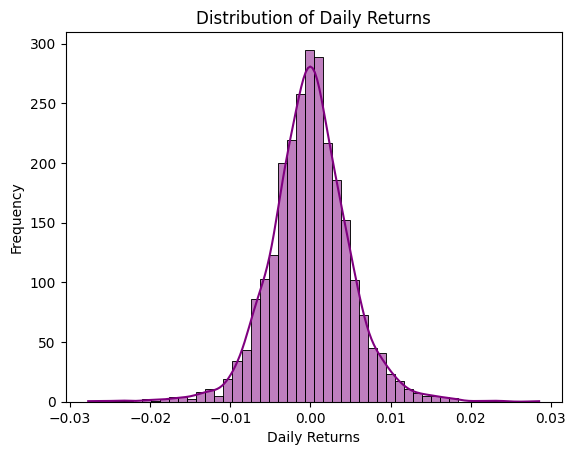

In [10]:
#visualizing daily return distribution
sns.histplot(data['Daily_Return'].dropna(), kde=True, bins=50, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

## Volitility Analysis

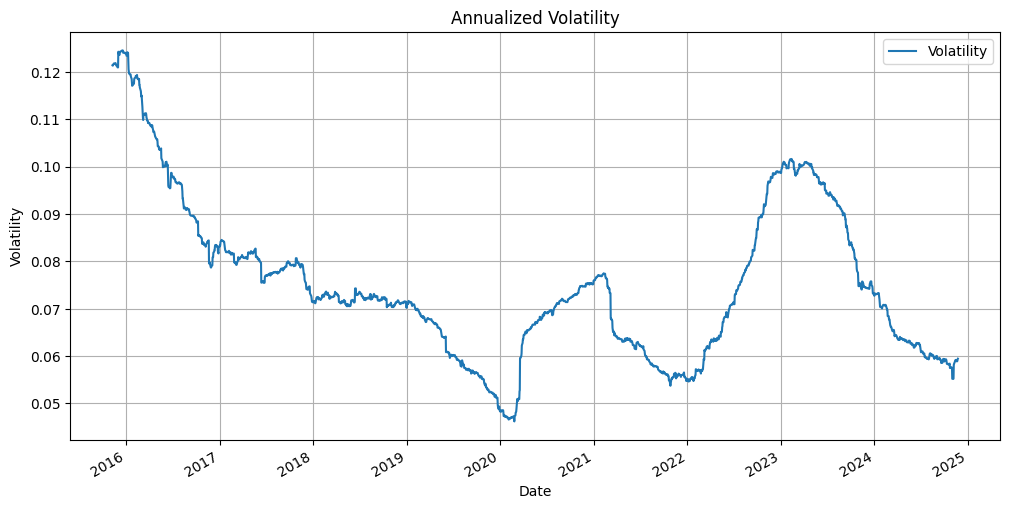

In [11]:
data['Volatility'] = data['Daily_Return'].rolling(window=252).std() * (252**0.5)  # 252 trading days
data[['Volatility']].plot(figsize=(12, 6), title='Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid()
plt.show()

#### High Volatility Periods:
2016: A peak in annualized volatility, likely due to significant geopolitical events (e.g., Brexit referendum).
2020: Another substantial spike in volatility, most likely caused by the global market impact of the COVID-19 pandemic.
2022–2023: High volatility corresponding to geopolitical instability (e.g., Russia-Ukraine conflict) and central bank interventions.

#### Low Volatility Periods:
2018–2019: Sustained low volatility indicates a period of market stability, with minimal disruptive economic or geopolitical events.
2021: A notable decline in volatility after the 2020 peak, reflecting temporary stabilization.

#### Recent Volatility (2024–2025):
A gradual decrease in volatility indicates the market may be stabilizing after the recent high-volatility period in 2022–2023.

## Correlation Analysis

In [12]:
corr_matrix = data[['Open', 'High', 'Low', 'Close']].corr()
print(corr_matrix)

           Open      High       Low     Close
Open   1.000000  0.998138  0.998018  0.999992
High   0.998138  1.000000  0.997576  0.998128
Low    0.998018  0.997576  1.000000  0.998021
Close  0.999992  0.998128  0.998021  1.000000


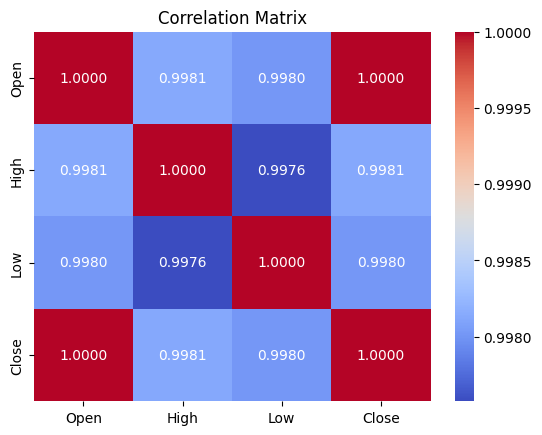

In [13]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Matrix')
plt.show()

#### High Correlation Across All Features:
The correlations between Open, High, Low, and Close are all above 0.997.
This is expected for financial time-series data, as these metrics are inherently derived from the same price movements within a day.

#### Implications for Feature Selection:
Including all four features (Open, High, Low, Close) may lead to redundancy in the model due to multicollinearity.
For most machine learning models, we might not need all four features; selecting just Close or creating derived features (e.g., daily range, average price) may suffice.

## Trend Detection

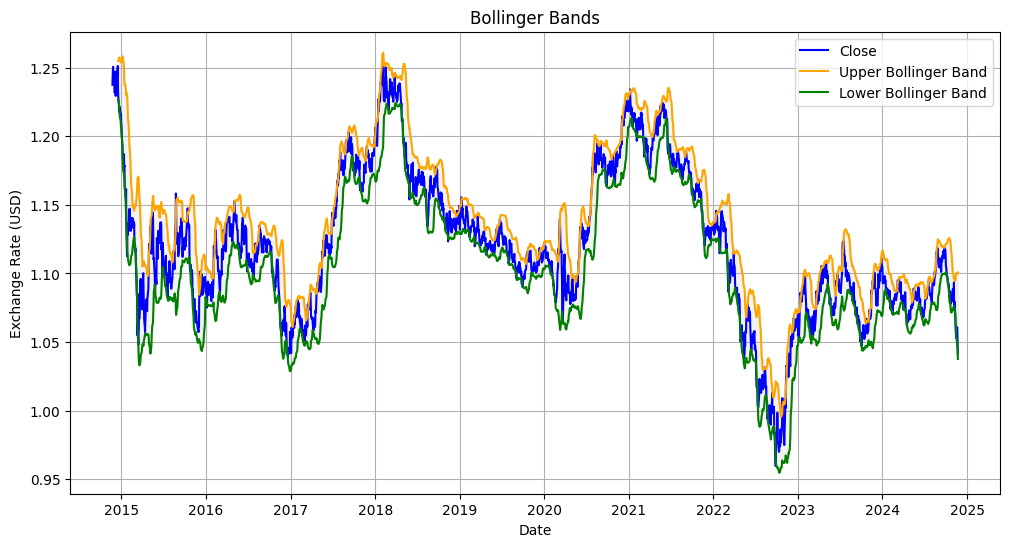

In [14]:
data['Upper_Band'] = data['MA20'] + (data['Rolling_STD'] * 2)
data['Lower_Band'] = data['MA20'] - (data['Rolling_STD'] * 2)
data['Bollinger_Bandwidth'] = data['Upper_Band'] - data['Lower_Band']

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close', color='blue')
plt.plot(data['Upper_Band'], label='Upper Bollinger Band', color='orange')
plt.plot(data['Lower_Band'], label='Lower Bollinger Band', color='green')
plt.fill_between(data.index, data['Lower_Band'], data['Upper_Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD)')
plt.legend()
plt.grid()
plt.show()


#### Volatility Representation:
The distance between the upper (orange) and lower (green) bands expands during periods of high volatility (e.g., 2020, 2022) and contracts during periods of low volatility (e.g., 2017–2018).

#### Price Behavior within Bands:
The closing price (blue line) frequently oscillates between the bands, staying within them most of the time, which is typical for Bollinger Bands (approximately 95% of price movements are expected to lie within ±2 standard deviations of the moving average).

#### Breakouts:
Occasional breakouts above the upper band (e.g., early 2023) or below the lower band (e.g., 2020) indicate extreme movements. These could signal overbought or oversold conditions, potentially triggering reversals.

#### Market Consolidation:
When the bands narrow significantly (e.g., 2017–2018), it suggests a period of low volatility and potential price consolidation, often preceding a larger price movement.

## Anomaly Detection

In [15]:
outliers = data[abs(data['Daily_Return']) > data['Daily_Return'].std() * 3]
outliers.head(n=10)

,Open,High,Low,Close,MA20,MA50,Rolling_STD,Daily_Return,Volatility,Upper_Band,Lower_Band,Bollinger_Bandwidth
date,,,,,,,,,,,,
2015-01-22,1.13465,1.13740,1.11218,1.13468,1.183213,NaN,0.023223,-0.023116,NaN,1.229659,1.136767,0.092893
2015-01-25,1.11408,1.12840,1.11408,1.11254,1.177993,NaN,0.026714,-0.019512,NaN,1.231421,1.124565,0.106856
2015-03-08,1.08456,1.09100,1.08378,1.08460,1.126880,1.148840,0.014947,-0.016860,NaN,1.156775,1.096986,0.059788
2015-03-18,1.08440,1.09140,1.06214,1.08500,1.098462,1.127079,0.031534,0.023768,NaN,1.161531,1.035393,0.126137
2015-03-19,1.06727,1.08149,1.06572,1.06689,1.094973,1.124825,0.030939,-0.016691,NaN,1.156851,1.033095,0.123756
2015-05-19,1.11468,1.11508,1.10657,1.11467,1.114646,1.091333,0.020029,-0.015848,NaN,1.154704,1.074588,0.080115
2015-06-02,1.11483,1.12833,1.10868,1.11500,1.113895,1.097207,0.017616,0.020782,NaN,1.149128,1.078662,0.070466
2015-06-08,1.12820,1.13397,1.12167,1.12810,1.113535,1.099793,0.017375,0.015556,NaN,1.148285,1.078784,0.069502
2015-06-23,1.11771,1.12400,1.11628,1.11722,1.119858,1.111397,0.015332,-0.015587,NaN,1.150522,1.089194,0.061327


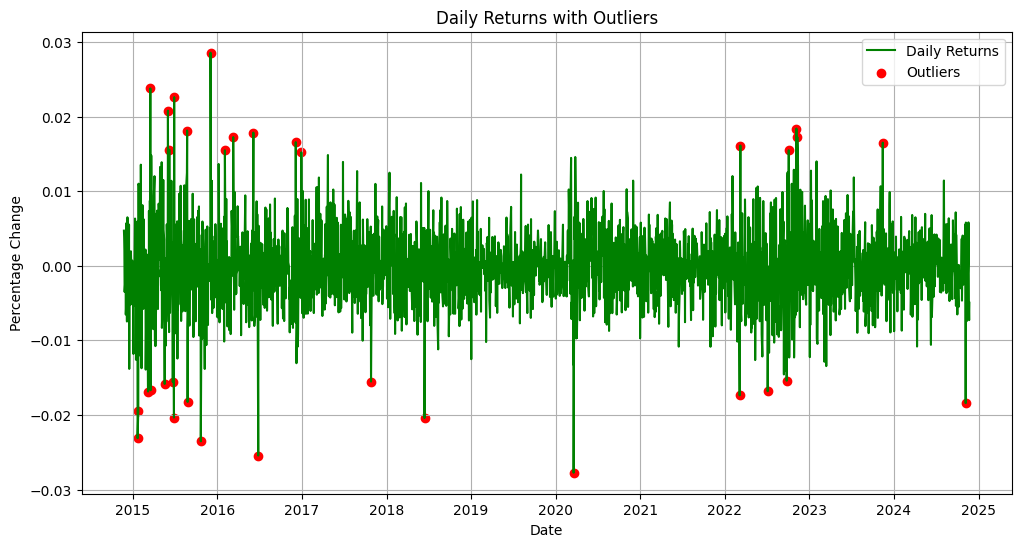

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data['Daily_Return'], label='Daily Returns', color='green')
plt.scatter(outliers.index, outliers['Daily_Return'], color='red', label='Outliers')
plt.title('Daily Returns with Outliers')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid()
plt.legend()
plt.show()

#### Outlier Distribution:
Most outliers occur during periods of market stress or high volatility, such as:
- 2015–2016: Likely related to economic or geopolitical events (e.g., Brexit uncertainty, ECB monetary policy changes).
- 2020: Significant market reaction during the onset of the COVID-19 pandemic.
- 2022: High-frequency outliers coincide with the Russia-Ukraine conflict and its global economic implications.

#### Magnitude of Outliers:
Positive spikes (e.g., >2%) are generally balanced by similarly large negative drops (<-2%), suggesting market reactions to extreme events are both upward and downward.

#### Stable Periods:
2017–2018 and 2021 show very few outliers, indicating periods of relative market stability.

#### Recent Outliers (2024–2025):
There is evidence of renewed volatility, with significant daily return deviations marking high-risk trading days.

----------

# Preproccesing

In [17]:
print(data.isnull().sum())

Open                     0
High                     0
Low                      0
Close                    0
MA20                    19
MA50                    49
Rolling_STD             19
Daily_Return             1
Volatility             252
Upper_Band              19
Lower_Band              19
Bollinger_Bandwidth     19
dtype: int64


In [18]:
data.bfill(inplace=True)
print(data.isnull().sum())

Open                   0
High                   0
Low                    0
Close                  0
MA20                   0
MA50                   0
Rolling_STD            0
Daily_Return           0
Volatility             0
Upper_Band             0
Lower_Band             0
Bollinger_Bandwidth    0
dtype: int64


### Adding more features

In [19]:
#Lagged features
data['Lag1_Close'] = data['Close'].shift(1)
data['Lag2_Close'] = data['Close'].shift(2)

In [20]:
#Moving Average Crossovers (Golden Cross and Death Cross)
# 1 = Golden Cross, 0 = Death Cross
data['MA_Crossover'] = (data['MA20'] > data['MA50']).astype(int)
data['Crossed_MA20'] = (data['Close'] > data['MA20']).astype(int)
data['Crossed_MA50'] = (data['Close'] > data['MA50']).astype(int)

In [21]:
#Price Momentum (Rate of Change)
data['Rate_of_Change'] = ((data['Close'] - data['Close'].shift(10)) / data['Close'].shift(10)) * 100

In [22]:
#Price Ranges (Daily and Weekly)
data['Daily_Range'] = data['High'] - data['Low']
data['Weekly_Range'] = data['Close'].rolling(5).max() - data['Close'].rolling(5).min()

In [23]:
# Bollinger band features
data['Above_Upper_Band'] = (data['Close'] > data['Upper_Band']).astype(int)
data['Below_Lower_Band'] = (data['Close'] < data['Lower_Band']).astype(int)
#Bollinger Band Percent (%B)
data['%B'] = (data['Close'] - data['Lower_Band']) / (data['Upper_Band'] - data['Lower_Band'])

In [24]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = calculate_rsi(data)

In [25]:
#Lagged Differences (Differencing Highly Correlated Features)
data['Close_Open_Diff'] = data['Close'] - data['Open']
data['High_Low_Diff'] = data['High'] - data['Low']

In [26]:
#Volitility Clusters
data['High_Volatility'] = (data['Volatility'] > data['Volatility'].mean() + 2 * data['Volatility'].std()).astype(int)

In [27]:
#Volatility Ratios
data['Volatility_Price_Ratio'] = data['Bollinger_Bandwidth'] / data['Close']

In [28]:
#Momentum based indicators
data['Momentum'] = data['Close'] - data['Close'].shift(5)

In [29]:
#return feature
data['Rolling_Return_5d'] = data['Daily_Return'].rolling(window=5).mean()

In [30]:
#Interaction features
data['MA20_MA50_Interaction'] = data['MA20'] * data['MA50']
data['Close_Volatility_Interaction'] = data['Close'] * data['Volatility']

In [31]:
# Exponential Moving Averages (EMA)
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()

In [32]:
# MACD (Moving Average Convergence Divergence)
data['MACD'] = data['EMA20'] - data['EMA50']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [33]:
# Seasonality Features
data['Day_of_Week'] = data.index.dayofweek  # 0=Monday, 6=Sunday
data['Month'] = data.index.month

In [34]:
print(f"Before filling\n{data.isnull().sum()}\n\nAfter filling\n:")
data.bfill(inplace=True)
print(data.isnull().sum())

Before filling
Open                             0
High                             0
Low                              0
Close                            0
MA20                             0
MA50                             0
Rolling_STD                      0
Daily_Return                     0
Volatility                       0
Upper_Band                       0
Lower_Band                       0
Bollinger_Bandwidth              0
Lag1_Close                       1
Lag2_Close                       2
MA_Crossover                     0
Crossed_MA20                     0
Crossed_MA50                     0
Rate_of_Change                  10
Daily_Range                      0
Weekly_Range                     4
Above_Upper_Band                 0
Below_Lower_Band                 0
%B                               0
RSI                             13
Close_Open_Diff                  0
High_Low_Diff                    0
High_Volatility                  0
Volatility_Price_Ratio           0
Momen

In [35]:
correlation_matrix = data.corr()
print(correlation_matrix['Close'].sort_values(ascending=False))

Close                           1.000000
Open                            0.999992
High                            0.998128
Low                             0.998021
Lag1_Close                      0.994582
Lag2_Close                      0.989283
EMA20                           0.978122
MA20                            0.970447
Lower_Band                      0.961356
MA20_MA50_Interaction           0.953789
Upper_Band                      0.952923
EMA50                           0.941531
MA50                            0.922349
Signal_Line                     0.344198
MACD                            0.335741
Crossed_MA50                    0.240665
MA_Crossover                    0.205597
RSI                             0.166430
%B                              0.138951
Crossed_MA20                    0.136592
Rate_of_Change                  0.131418
Rolling_Return_5d               0.103651
Momentum                        0.100762
Close_Open_Diff                 0.055527
Daily_Return    

### Selective Scalling of features

In [36]:
# exclude dummy features from scalling
excluded_columns = ['Day_of_Week', 'Month', 'High_Volatility', 'Above_Upper_Band', 'Below_Lower_Band']
columns_to_scale = [col for col in data.columns if col not in excluded_columns]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[columns_to_scale])
scaled_data = pd.DataFrame(scaled_features, columns=columns_to_scale, index=data.index)
final_data = pd.concat([scaled_data, data[excluded_columns]], axis=1)
final_data.head()

,Open,High,Low,Close,MA20,MA50,Rolling_STD,Daily_Return,Volatility,Upper_Band,...,Close_Volatility_Interaction,EMA20,EMA50,MACD,Signal_Line,Day_of_Week,Month,High_Volatility,Above_Upper_Band,Below_Lower_Band
date,,,,,,,,,,,,,,,,,,,,,
2014-11-23,2.191889,2.257424,2.252358,2.192606,2.266625,1.613936,-0.412957,0.954561,2.01357,2.215342,...,2.658475,2.219578,2.257584,0.092931,0.093239,6,11,1,0,0
2014-11-24,2.308272,2.330381,2.312030,2.302185,2.266625,1.613936,-0.412957,0.954561,2.01357,2.215342,...,2.689204,2.230200,2.262066,0.128314,0.100489,0,11,1,0,0
2014-11-25,2.389062,2.416758,2.384088,2.391431,2.266625,1.613936,-0.412957,0.775757,2.01357,2.215342,...,2.714231,2.248461,2.270022,0.187758,0.118470,1,11,1,0,0
2014-11-26,2.439155,2.409953,2.424995,2.439066,2.266625,1.613936,-0.412957,0.417363,2.01357,2.215342,...,2.727590,2.269600,2.279614,0.254458,0.146521,2,11,1,0,0
2014-11-27,2.350267,2.350416,2.359130,2.356410,2.266625,1.613936,-0.412957,-0.694317,2.01357,2.215342,...,2.704410,2.280713,2.285450,0.285147,0.175250,3,11,1,0,0


In [37]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2608 entries, 2014-11-23 to 2024-11-22
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open                          2608 non-null   float64
 1   High                          2608 non-null   float64
 2   Low                           2608 non-null   float64
 3   Close                         2608 non-null   float64
 4   MA20                          2608 non-null   float64
 5   MA50                          2608 non-null   float64
 6   Rolling_STD                   2608 non-null   float64
 7   Daily_Return                  2608 non-null   float64
 8   Volatility                    2608 non-null   float64
 9   Upper_Band                    2608 non-null   float64
 10  Lower_Band                    2608 non-null   float64
 11  Bollinger_Bandwidth           2608 non-null   float64
 12  Lag1_Close                    2608 non-null 

In [38]:
scaled_data.to_csv("../data/processed/scaled_EURUSD_daily.csv", index=True)
print("Successfully saved new processed data")

Successfully saved new processed data
